In [46]:
N = ord("S") % 3 + 1

In [59]:
print(N)

3


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        col_index = header.index(column_name)
        column_data = [int(row[col_index]) for row in reader]
    return np.array(column_data)

In [6]:
apc_losses = read_csv_column('russia_losses_equipment.csv', 'APC')

In [10]:
daily_apc_losses = np.diff(apc_losses)

In [12]:
top_5_losses = np.sort(daily_apc_losses)[-5:]
print(top_5_losses)

[ 0  0  0  0 14]


In [26]:
import pandas as pd

df = pd.read_csv('russia_losses_equipment.csv')

In [32]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

In [34]:
import pandas as pd

def losses_in_summer_2024(filename):
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date'])
    summer_2024 = df[(df['date'] >= '2024-06-01') & (df['date'] <= '2024-08-31')]
    return summer_2024['APC'].sum()

summer_losses = losses_in_summer_2024('russia_losses_equipment.csv')
print(summer_losses)

1459103


In [36]:
mean_apc_losses = np.mean(apc_losses[100:500])
print(mean_apc_losses)

11065.7625


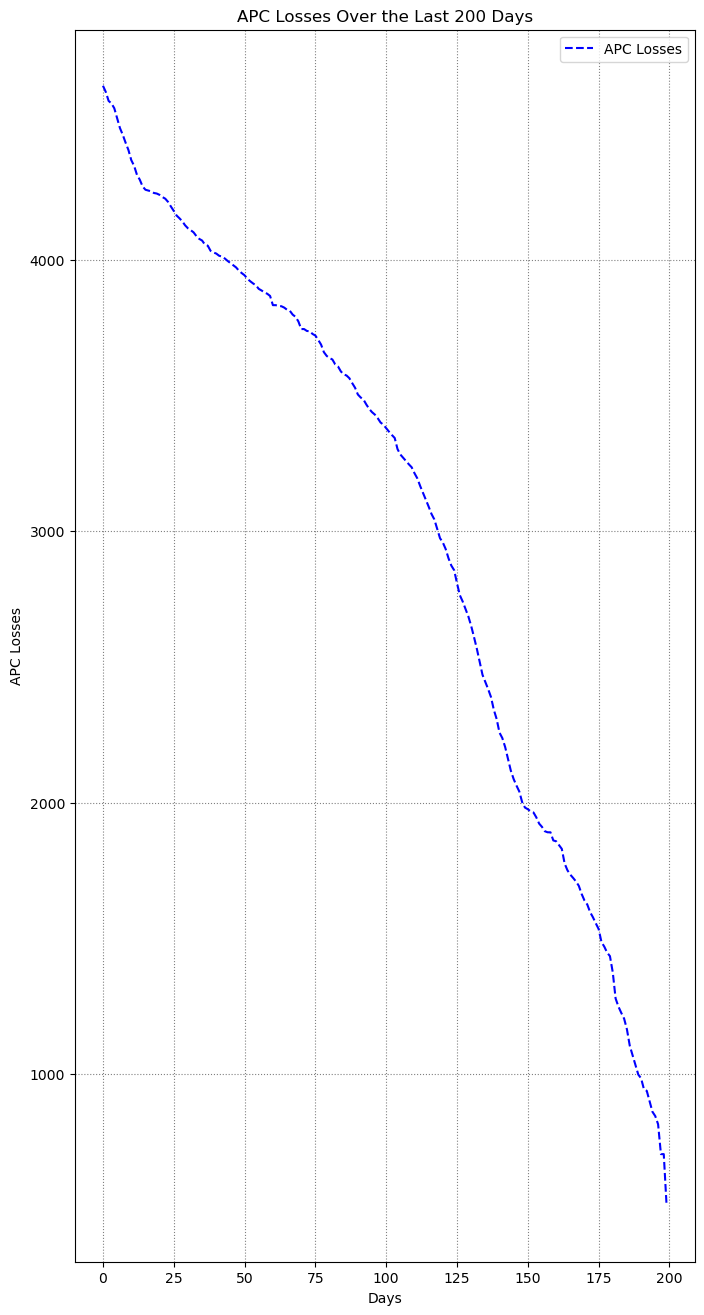

In [38]:
def plot_apc_losses(apc_data):
    last_200_days = apc_data[-200:]
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(last_200_days, linestyle='--', color='b', label='APC Losses')
    
    plt.title('APC Losses Over the Last 200 Days')
    plt.xlabel('Days')
    plt.ylabel('APC Losses')
    plt.legend()
    plt.grid(True, color='gray', linestyle=':')
    
    plt.savefig('apc_losses_last_200_days.png')
    plt.show()

plot_apc_losses(apc_losses)